In [1]:
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count
import gc
import time
gc.enable()
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Collect preprocessed data
data1 = pd.read_feather('data/Divvy_data_2017_Q1.feather')
data2 = pd.read_feather('data/Divvy_data_2017_Q2.feather')
data3 = pd.read_feather('data/Divvy_data_2017_Q3.feather')
data4 = pd.read_feather('data/Divvy_data_2017_Q4.feather')

data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [3]:
# Get the percentage of trips that biker returns the bike to the same station
same_station_ratio = sum(data['from_station_id'] == data['to_station_id'])/data.shape[0]
print(f'Percentage of bike return to the same station is {same_station_ratio*100: .2f}% ')

Percentage of bike return to the same station is  3.17% 


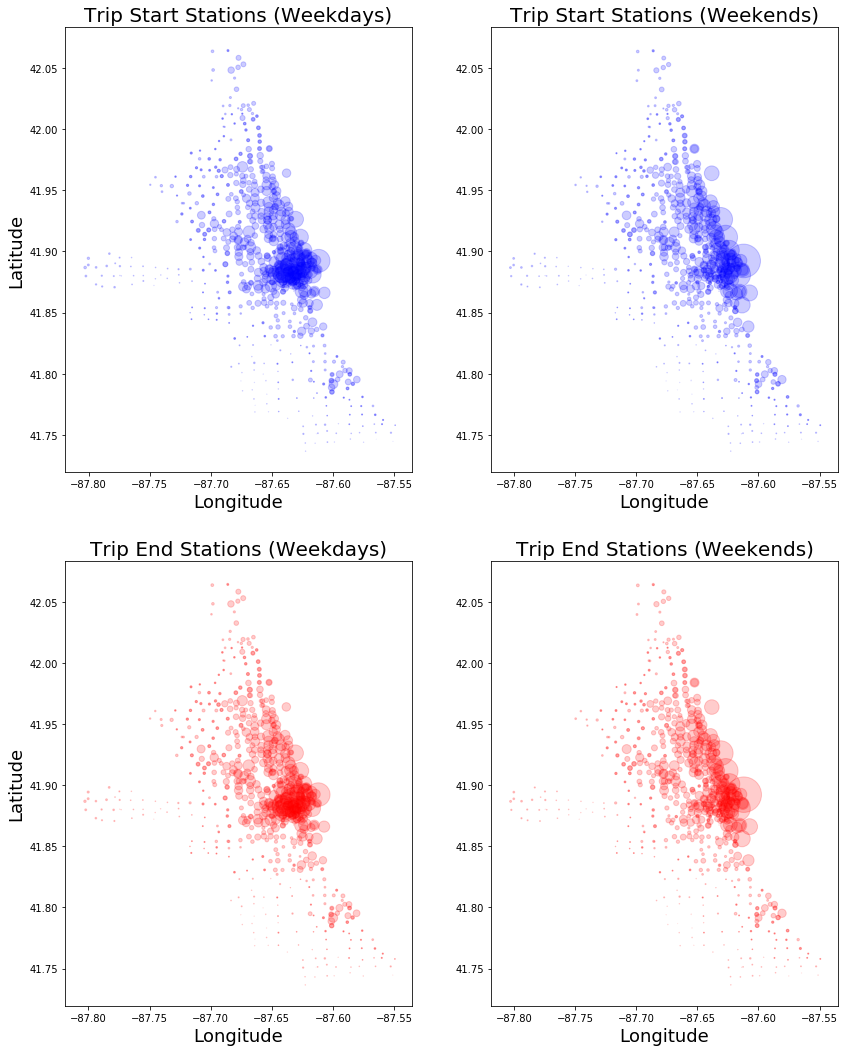

In [4]:
# Collect number of trips for each station during weekdays/weekends
station_start_wd = data[data['dayofweek'] < 5][['from_longitude', 'from_latitude', 'tripduration']]
station_start_wd = station_start_wd.groupby(['from_longitude', 'from_latitude'])
station_start_wd = station_start_wd.count().reset_index()

station_end_wd = data[data['dayofweek'] < 5][['to_longitude', 'to_latitude', 'tripduration']]
station_end_wd = station_end_wd.groupby(['to_longitude', 'to_latitude'])
station_end_wd = station_end_wd.count().reset_index()

station_start_we = data[data['dayofweek'] > 4 ][['from_longitude', 'from_latitude', 'tripduration']]
station_start_we = station_start_we.groupby(['from_longitude', 'from_latitude'])
station_start_we = station_start_we.count().reset_index()

station_end_we = data[data['dayofweek'] > 4][['to_longitude', 'to_latitude', 'tripduration']]
station_end_we = station_end_we.groupby(['to_longitude', 'to_latitude'])
station_end_we = station_end_we.count().reset_index()

# Visualize data over GPS coordinates
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 18))
x = station_start_wd['from_longitude']
y = station_start_wd['from_latitude']
s = station_start_wd['tripduration'] / 100 
ax[0, 0].scatter(x, y, s=s, alpha=0.2, c='b')
ax[0, 0].set_title('Trip Start Stations (Weekdays)', fontsize=20)
ax[0, 0].set_xlabel('Longitude', fontsize=18)
ax[0, 0].set_ylabel('Latitude', fontsize=18)
ax[0, 0].set_aspect('equal')

x = station_end_wd['to_longitude']
y = station_end_wd['to_latitude']
s = station_end_wd['tripduration'] / 100 
ax[1, 0].scatter(x, y, s=s, alpha=0.2, c='red')
ax[1, 0].set_title('Trip End Stations (Weekdays)', fontsize=20)
ax[1, 0].set_xlabel('Longitude', fontsize=18)
ax[1, 0].set_ylabel('Latitude', fontsize=18)
ax[1, 0].set_aspect('equal')

x = station_start_we['from_longitude']
y = station_start_we['from_latitude']
s = station_start_we['tripduration'] / 40
ax[0, 1].scatter(x, y, s=s, alpha=0.2, c='b')
ax[0, 1].set_title('Trip Start Stations (Weekends)', fontsize=20)
ax[0, 1].set_xlabel('Longitude', fontsize=18)
ax[0, 1].set_aspect('equal')

x = station_end_we['to_longitude']
y = station_end_we['to_latitude']
s = station_end_we['tripduration'] / 40
ax[1, 1].scatter(x, y, s=s, alpha=0.2, c='red')
ax[1, 1].set_title('Trip End Stations (Weekends)', fontsize=20)
ax[1, 1].set_xlabel('Longitude', fontsize=18)
ax[1, 1].set_aspect('equal')

plt.show()

### Each marker represents a divvy bike station (based on its GPS coordinates). The size of each marker denotes the bicycle usage of that station. 

### The difference between the trip start and trip end is not significant, even though only 3.17% of biker return their bikes to the start stations. This implies that number of bikes at each station are relatively balanced. Further analysis should focus on the net number of bikes changes.

### However, the bike usages between weekdays and weekends are quite different. During weekdays, there are high demands of bikes in the Loop Area of Chicago, where big companies locate. During weekends, people tend to rent bike closer to the Lake Michigan, where people usually spend time with friends and families. 

### This EDA indicates that the bike usage has correlation with the location of the stations and the time period. Therefore, geo-level and time-level features should be taken into account for example, the traffic of the day around the Divvy bike station, crime rate over past few days around the bike station and etc.